# Clustering home work

<div align="justify"> In this issue we will collect articles published in Daily Kos, an American political blog that publishes news and opinion articles
written from a progressive point of view. Daily Kos was founded by Markos Molitsas in 2002, and as of September 2014, the
site had an average weekday traffic of hundreds of thousands of visits.
The file (dailykos (CSV - 10.1MB) contains data on 3,430 news articles or blogs published in Daily Kos. These articles
were published in 2004, leading to the United States presidential election. The leading candidates were President
Incumbent George. Bush (Republican) and John Kerry (Democrat). Foreign policy was a dominant issue in the elections, and especially
The invasion of Iraq in 2003.
Each one of the variables in the data set is a word that appeared in at least 50 different articles (1,545 words in total). The set
of words is trimmed according to some of the existing techniques in text analysis (punctuation removed and stop words removed).
For each document, the variable value is the number of times the word appeared in the document.</div>

## import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples  

In [2]:
dataframe = pd.read_csv('C:/Users/YaelD/Desktop/dailykos.csv')

In [3]:
dataframe.head()

,Document,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


## Partitional clustering - using KMeans

For n_clusters = 2 ,The average silhouette score is : 0.6257610722937336 ,The SSE score is : 841594725.9672823


C:\Users\YaelD\AppData\Local\Temp\ipykernel_23640\3725902651.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,


For n_clusters = 3 ,The average silhouette score is : 0.5882297332494477 ,The SSE score is : 374537800.44261533


C:\Users\YaelD\AppData\Local\Temp\ipykernel_23640\3725902651.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,


For n_clusters = 7 ,The average silhouette score is : 0.5404715509751489 ,The SSE score is : 69523456.00600614


C:\Users\YaelD\AppData\Local\Temp\ipykernel_23640\3725902651.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,


For n_clusters = 8 ,The average silhouette score is : 0.5346859993078394 ,The SSE score is : 53433974.725513585


C:\Users\YaelD\AppData\Local\Temp\ipykernel_23640\3725902651.py:106: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,


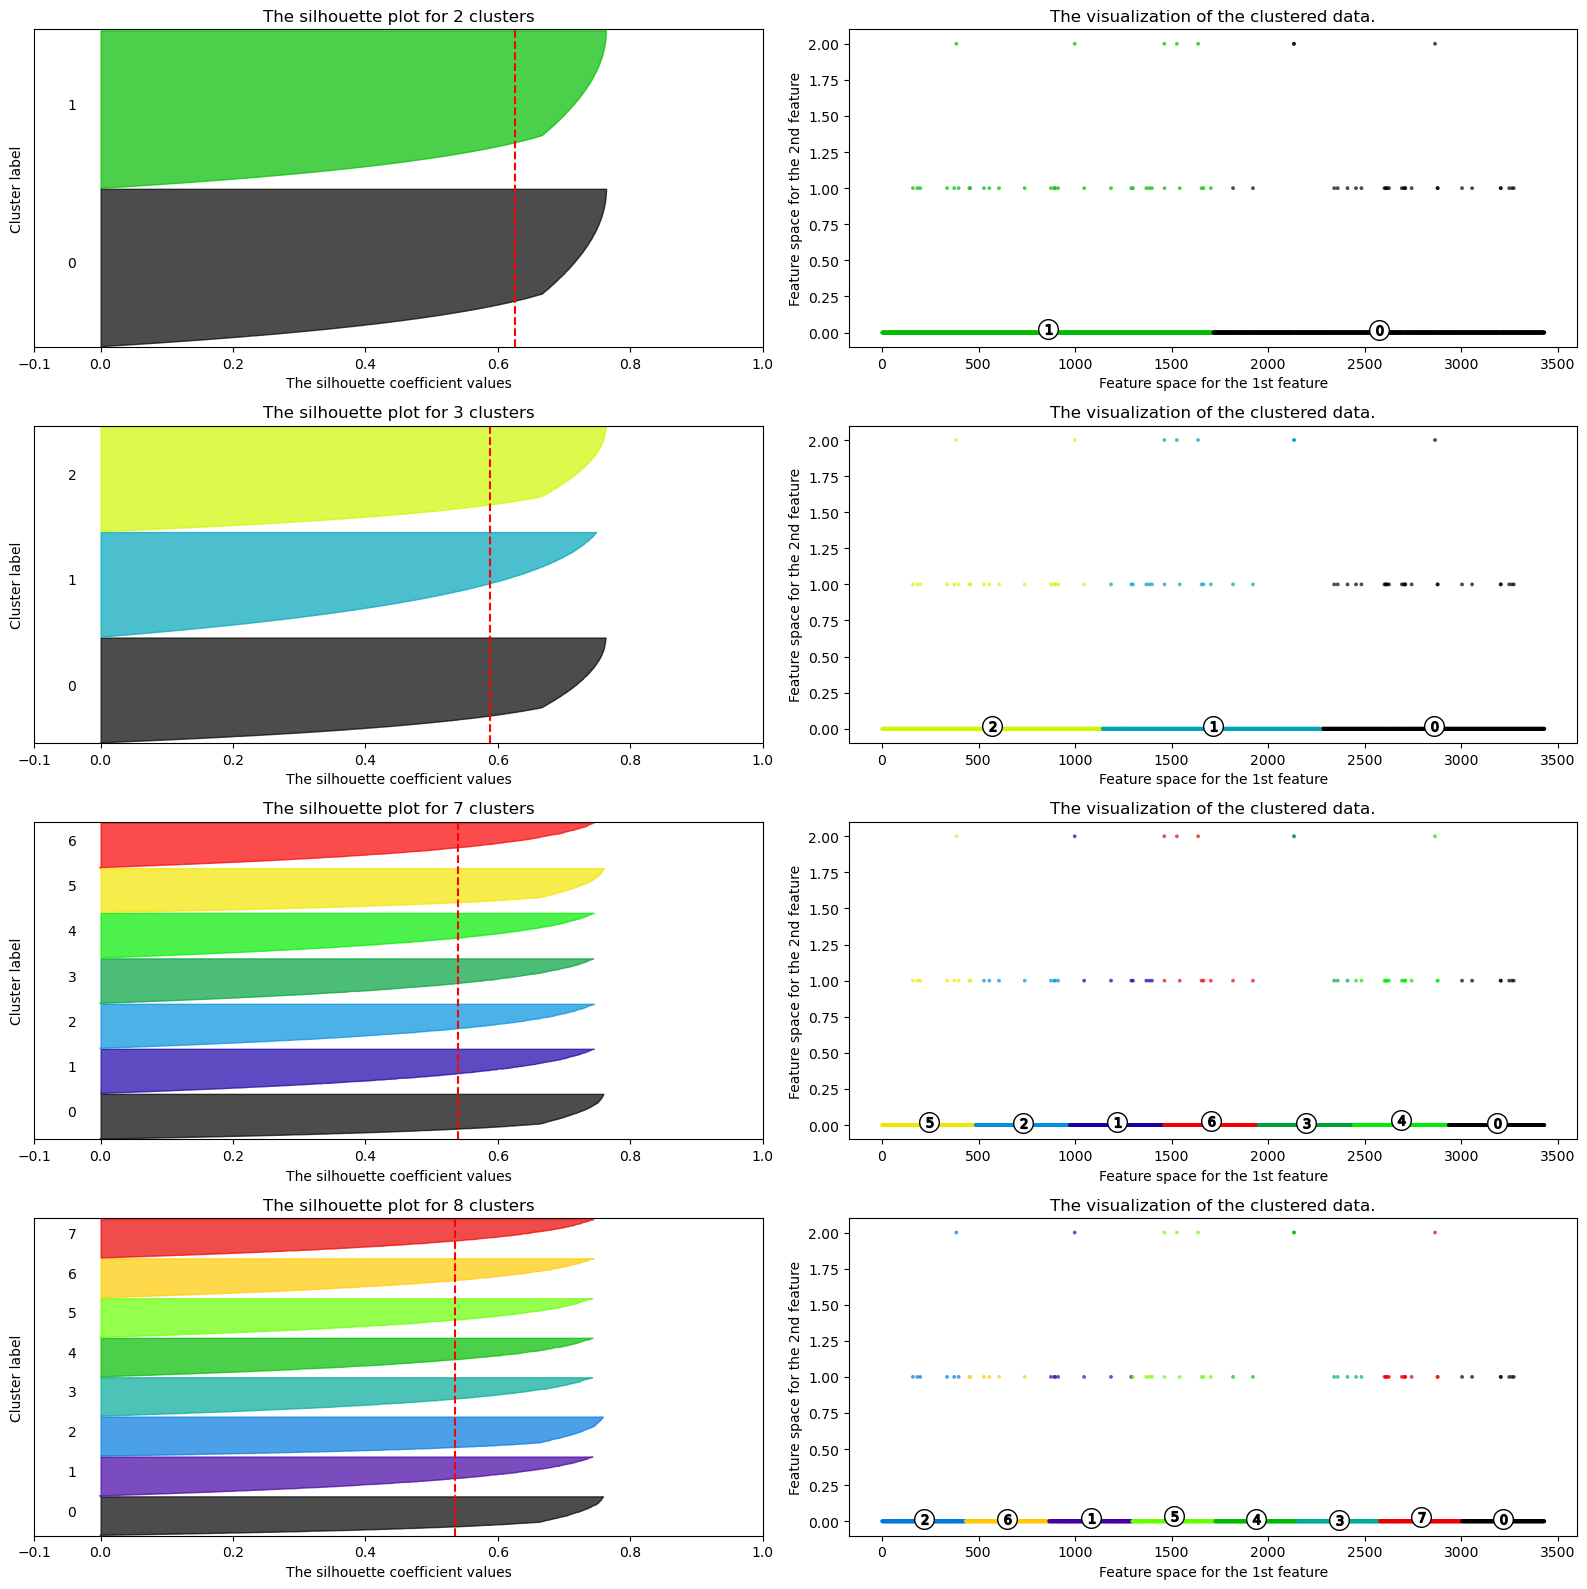

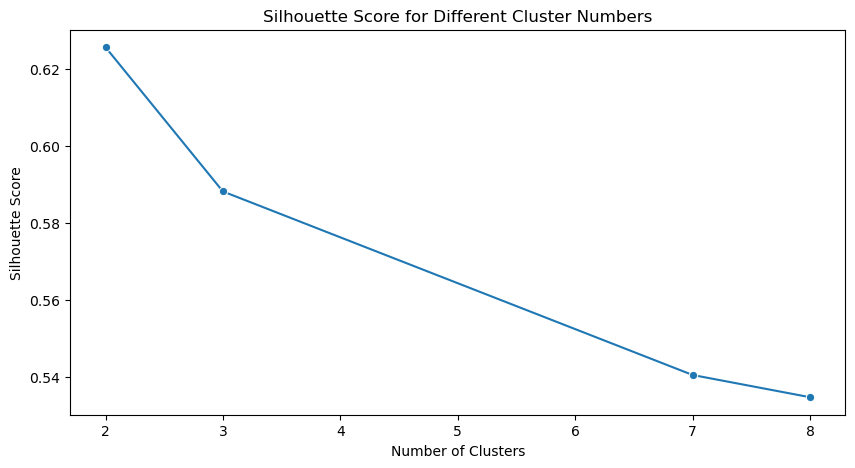

,num_of_clusters,SSE,silhouette_avg,max,min,samples_per_cluster,num_of_samples
0,2,8.415947e+08,0.625761,1716,1714,"{0: 1714, 1: 1716}",3430
1,3,3.745378e+08,0.588230,1145,1142,"{0: 1145, 1: 1143, 2: 1142}",3430
2,7,6.952346e+07,0.540472,495,485,"{0: 495, 1: 488, 2: 487, 3: 492, 4: 493, 5: 48...",3430
3,8,5.343397e+07,0.534686,433,425,"{0: 427, 1: 431, 2: 433, 3: 426, 4: 427, 5: 42...",3430


In [4]:
# Define the range of clusters you want to try
range_n_clusters = [2, 3, 7, 8]

# Create an empty DataFrame to store the results
clusters_df = pd.DataFrame(columns=['num_of_clusters', 'SSE', 'silhouette_avg', 'max', 'min', 'samples_per_cluster', 'num_of_samples'])

# Create a subplot with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# Create an empty list to store Silhouette scores for different cluster numbers
silhouette_scores = []

for n_clusters, ax_row in zip(range_n_clusters, axes):
    ax_silhouette, ax_scatter = ax_row

    # Perform K-means clustering
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(dataframe)
    cluster_labels = clusterer.labels_

    # Measure quality using silhouette score
    silhouette_avg = silhouette_score(dataframe, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    sample_silhouette_values = silhouette_samples(dataframe, cluster_labels)
    
    # Measure quality using SSE
    sse = clusterer.inertia_
    
    # Quality scores
    print(
        "For n_clusters =", n_clusters, ','
        "The average silhouette score is :", silhouette_avg, ','
        "The SSE score is :", sse,)
    
    #===================Graphic visualization start=====================#
    # I used scikit library to make the next part #
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py#
    
    # The subplot is the silhouette plot
    ax_silhouette.set_xlim([-0.1, 1])
    ax_silhouette.set_ylim([0, len(dataframe) + (n_clusters + 1) * 10])
    
    y_lower = 10
    cluster_samples = {}
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax_silhouette.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax_silhouette.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

        cluster_samples[i] = size_cluster_i

    ax_silhouette.set_title(f"The silhouette plot for {n_clusters} clusters")
    ax_silhouette.set_xlabel("The silhouette coefficient values")
    ax_silhouette.set_ylabel("Cluster label")

    ax_silhouette.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax_silhouette.set_yticks([])  # Clear the y-axis labels/ticks
    ax_silhouette.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax_scatter.scatter(
        dataframe.iloc[:, 0], dataframe.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax_scatter.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax_scatter.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax_scatter.set_title("The visualization of the clustered data.")
    ax_scatter.set_xlabel("Feature space for the 1st feature")
    ax_scatter.set_ylabel("Feature space for the 2nd feature")
    
    #===================Graphic visualization end=====================#
    
    # Collect results into the DataFrame
    sumple_count = np.bincount(cluster_labels)
    clusters_df = clusters_df.append({'num_of_clusters': n_clusters, 'SSE': sse, 'silhouette_avg': silhouette_avg,
                            'max': sumple_count.max(), 'min': sumple_count.min(),
                            'samples_per_cluster': cluster_samples, 'num_of_samples': sumple_count.sum()},
                           ignore_index=True)

# Adjust layout
plt.tight_layout()
plt.show()

# Another method of visualization can't hurt
plt.figure(figsize=(10, 5))
sns.lineplot(x=range_n_clusters, y=silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Save results to CSV file
clusters_df.to_csv('cluster_results.csv', index=False)
clusters_df

## Conclusion:
<h4> Optimal number of clusters:</h4>
<div align="justify"> According to the graph data and the quality scores for each cluster, I would choose 3 clusters as the optimal number of clusters. The SSE index is the lowest among all clusters (lower is better) and yet it is the second closest to 1 (when closer to 1 is better), I did not choose the number of clusters 2 where the silhouette is closest to 1 because an index The SSE error is the highest, therefore in the trade-off the number of clusters 3 is optimal in my opinion.</div>
<h4> Maximum and minimum examples per cluster:</h4>
<div align="justify"> The cluster that has the maximum number of examples is 2 and the number is 1716
The cluster that has the minimum number of examples is 8 and the number is 425</div>
<h4> Cluster association according to quality data:</h4>
<div align="justify"> If you look at the data of each cluster in the table that we will export without knowing the number of clusters in that row of data, you can decide what the number of clusters will be by looking at the last graph where you can see which cluster received a higher score in its silhouette and thus associate the row of data with the appropriate number of clusters to him</div>

## Hierarchical clustering

Final Number of Clusters Ward linkage:8
Final Number of Clusters Complete linkage:8
Final Number of Clusters Average linkage:8
Final Number of Clusters Single linkage:8


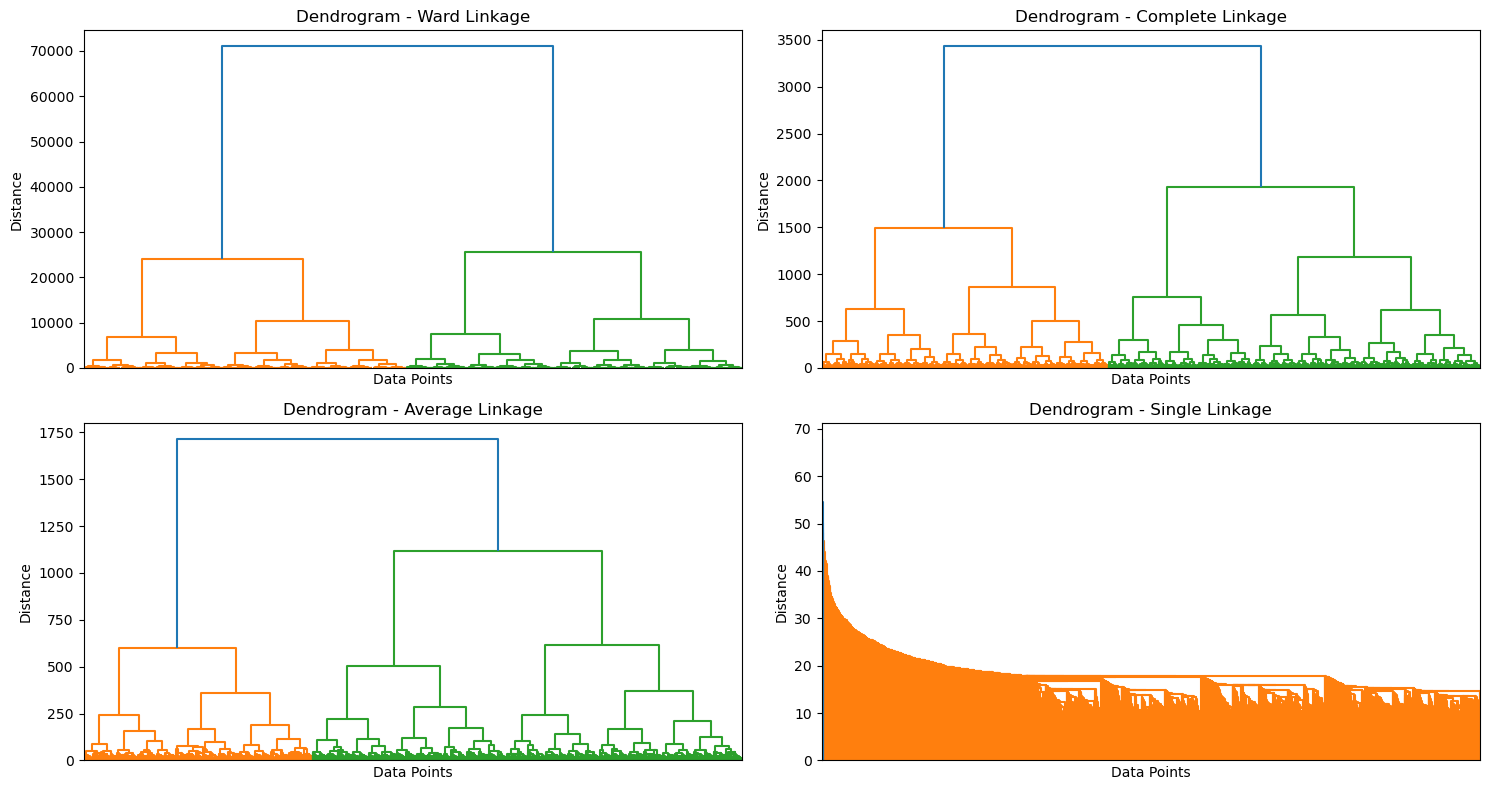

In [5]:
# Define the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

# Plot all dendrograms together
plt.figure(figsize=(15, 8))
for method, linkage_method in enumerate(linkage_methods, 1):
    # Perform hierarchical clustering
    agg_model = AgglomerativeClustering(n_clusters=None, linkage=linkage_method, distance_threshold=0).fit(dataframe)

    # Create linkage matrix
    linkage_matrix = linkage(dataframe, linkage_method)

    # Plot dendrogram
    plt.subplot(2, 2, method)
    dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
    plt.title(f'Dendrogram - {linkage_method.capitalize()} Linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis tick labels (They cannot be read and are in the way)

    print(f'Final Number of Clusters {linkage_method.capitalize()} linkage:{n_clusters}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Comparison between the different dendograms:

#### cluster heights:
   - It seems that ward linkage and complete linkage are quite similar (relatively) in their cluster heights and average linkage and single stand on their own (different from the others).
   - Similarities: Clusters that are merged at similar heights across different methods may indicate robust cluster structures.
   - Differences: Different heights of merging can suggest variations in how clusters are formed.

#### Branch Lengths:
   - It seems that ward linkage complete linkage and average linkage are quite similar (relatively) in the lengths of the branches, and single stands on its own (different from the others).
   - Similarities: Similar branch lengths may indicate similar distances or dissimilarities between clusters.
   - Differences: Varied branch lengths may suggest differences in the compactness or dispersion of clusters.

#### Substructure Patterns:
   - It seems that ward linkage complete linkage and average linkage are quite similar (relatively) Substructure Patterns, and single stands on its own (very different from the others).
   - Similarities: Common substructures across different methods may indicate consistent grouping of data.
   - Differences: Varied substructure patterns may suggest that certain methods are sensitive to specific patterns in the data.

#### Number of Final Clusters:
   - For all methods the final number of meals is the same - 8
   - Similarities: If different linkage methods result in a similar number of final clusters, it may suggest stable clustering.

#### Inter-Cluster Distances:
   - It seems that ward linkage complete linkage and average linkage are quite similar (relatively) in Inter-Cluster Distances, and single stands on its own (very different from the others). 
   - Similarities: Similar inter-cluster distances may suggest comparable cluster separations.
   - Differences: Varied inter-cluster distances may indicate differences in the compactness or separation of clusters.

#### Visual Patterns:
   - It looks like ward linkage complete linkage and average linkage are quite similar (relatively) in Visual Patterns, and single stands on its own (very different from the others).
   - Similarities: Similar inter-cluster distances may suggest comparable cluster separations.
   - Differences: Varied inter-cluster distances may indicate differences in the compactness or separation of clusters.